# 1.1	Dataset size vs model performance
Here, you will quantify the relationship between the dataset size and the model performance. 

Essentially, you will answer the question: how much data is enough to model client behaviour? 

In order to do this, pick the best single tree model you created in Assignment #5 and evaluate it with datasets of different sizes using the monthly features you created in Assignment #3.

### 1.	Split the train/test sets with 9:1 ratio.
This split should give you approximately 291k/32k samples in train/test set, respectively.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
import statistics
import matplotlib.pyplot as plt

# Monthly features created in A3:
df1 = pd.read_excel('mth_rolling_features.xlsx')
df2 = pd.read_excel('mth_day_counts.xlsx')
df3 = pd.read_excel('days_since_last_txn.xlsx')
df4 = pd.read_csv('Retail_Data_Response.csv')  # ==> output feature

# Combine the input features into a single df
temp = df1.merge(df2, how='left', on=['Unnamed: 0','CLNT_NO',
                                      'ME_DT']).merge(df3, how='left', on=['Unnamed: 0','CLNT_NO','ME_DT'])

In [2]:
#check any missing values
temp.isna().sum()

Unnamed: 0                 0
CLNT_NO                    0
ME_DT                      0
mth_txn_amt_sum            0
mth_txn_amt_cnt            0
amt_sum_3M             13778
amt_mean_3M            13778
amt_max_3M             13778
txn_cnt_sum_3M         13778
txn_cnt_mean_3M        13778
txn_cnt_max_3M         13778
amt_sum_6M             34445
amt_mean_6M            34445
amt_max_6M             34445
txn_cnt_sum_6M         34445
txn_cnt_mean_6M        34445
txn_cnt_max_6M         34445
amt_sum_12M            75779
amt_mean_12M           75779
amt_max_12M            75779
txn_cnt_sum_12M        75779
txn_cnt_mean_12M       75779
txn_cnt_max_12M        75779
cnt_Friday                 0
cnt_Monday                 0
cnt_Saturday               0
cnt_Sunday                 0
cnt_Thursday               0
cnt_Tuesday                0
cnt_Wednesday              0
days_since_last_txn        0
dtype: int64

In [3]:
# The missing values are all belongs to the mth_rolling_features, because of the lack of inoformation before
# the start of the time period, we decide to fill them with '0'.
temp = temp.fillna('0')

# Add the output value to the df
df4 = df4.rename(columns = {'customer_id':'CLNT_NO'})
df = temp.merge(df4, how="left", on="CLNT_NO")
df = df.dropna()
df = df.iloc[:,3:].astype(float)
df

,mth_txn_amt_sum,mth_txn_amt_cnt,amt_sum_3M,amt_mean_3M,amt_max_3M,txn_cnt_sum_3M,txn_cnt_mean_3M,txn_cnt_max_3M,amt_sum_6M,amt_mean_6M,...,txn_cnt_max_12M,cnt_Friday,cnt_Monday,cnt_Saturday,cnt_Sunday,cnt_Thursday,cnt_Tuesday,cnt_Wednesday,days_since_last_txn,response
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,0.0
1,56.0,1.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,15.0,0.0
2,0.0,0.0,56.0,18.666667,56.0,1.0,0.333333,1.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46.0,0.0
3,96.0,1.0,152.0,50.666667,96.0,2.0,0.666667,1.0,0.0,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0
4,0.0,0.0,96.0,32.000000,96.0,1.0,0.333333,1.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323778,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,61.0,10.166667,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,98.0,0.0
323779,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,61.0,10.166667,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,129.0,0.0
323780,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,35.0,5.833333,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,160.0,0.0
323781,34.0,1.0,34.0,11.333333,34.0,1.0,0.333333,1.0,34.0,5.666667,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
X = df.drop(columns = ['response'])
y = df.response
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1, random_state=1147)
print('Sample size:Train set:{} |Test set:{}'.format(X_train.shape[0],X_test.shape[0]))

Sample size:Train set:291193 |Test set:32355


### 2.	Initialize and create a for loop in which you take N samples (e.g. 50), build a tree model with the N samples and evaluate the test set AUC. 
#### Repeat the sampling process 10 times and append the test set AUC. 

In [5]:
#create empty  test set AUC
test_auc= []

#Repeat the sampling process 10 times
for i in range(10):
    X_train_sample = X_train.sample(n = 50)
    y_train_sample = y_train[X_train_sample.index]
    
    model = DecisionTreeClassifier(random_state= 1147,class_weight= {0.0:1,1.0:10},max_depth= 5) 
    model.fit(X_train_sample, y_train_sample)
    scores = model.predict_proba(X_test)[:, 1]
    fpr_test, tpr_test, i = roc_curve(y_test, scores)
    auc_score = auc(fpr_test, tpr_test)
    test_auc.append(auc_score)
    
print('The test set AUC:',test_auc)

The test set AUC: [0.4954969246561741, 0.5209473065917806, 0.5360675037270538, 0.5368388206566888, 0.5471276372576716, 0.4852825596258681, 0.49185879990266307, 0.49350357041963977, 0.5305288920091408, 0.5289005457022105]


In [6]:
df_2 = pd.DataFrame(test_auc,columns=['Test AUC'])
df_2.index +=1
print('The output when sample size=50:')
df_2.rename_axis('sample #')

The output when sample size=50:


,Test AUC
sample #,
1,0.495497
2,0.520947
3,0.536068
4,0.536839
5,0.547128
6,0.485283
7,0.491859
8,0.493504
9,0.530529


#### Calculate the mean and standard deviation of the test AUC for N samples.

In [7]:
print('Mean of test AUC:',sum(test_auc)/len(test_auc))
print('Standard deviation of test AUC for 50 samples :',statistics.pstdev(test_auc))

Mean of test AUC: 0.5166552560548892
Standard deviation of test AUC for 50 samples : 0.02157871660017189


### 3. Repeat the procedure you performed in the previous step for different sample size N 
(e.g. 100, 500, 1000, 2000, 5000, 10000)  .

In [25]:
N=[100,500,1000,2000,5000,10000,20000,30000,40000,50000,80000,100000]
test_auc= []
for k in N:
    test_auc_k =[]
    for i in range(10):
        X_train_sample = X_train.sample(n = k)
        y_train_sample = y_train[X_train_sample.index]
        model = DecisionTreeClassifier(random_state= 1147,class_weight= {0.0:1,1.0:10},max_depth = 5)
        model.fit(X_train_sample, y_train_sample)
        scores =model.predict_proba(X_test)[:, 1]
        fpr_test, tpr_test, i = roc_curve(y_test, scores)
        auc_score = auc(fpr_test, tpr_test)
        test_auc_k.append(auc_score)
    test_auc.append(test_auc_k)

In [26]:
df_AUC = pd.DataFrame(data=test_auc, index = N).T
df_AUC = df_AUC.rename_axis('Sample #').rename_axis('Sample size',axis=1)
df_AUC.index +=1
df_AUC

Sample size,100,500,1000,2000,5000,10000,20000,30000,40000,50000,80000,100000
Sample #,,,,,,,,,,,,
1,0.509849,0.535190,0.556686,0.553072,0.604434,0.614453,0.621851,0.628241,0.626808,0.635835,0.641685,0.642383
2,0.460982,0.526773,0.524013,0.558818,0.584521,0.601491,0.624005,0.630755,0.636401,0.637020,0.636400,0.639878
3,0.499858,0.527967,0.570365,0.555827,0.596492,0.607885,0.626855,0.621811,0.635967,0.635100,0.638367,0.642966
4,0.473638,0.513651,0.537022,0.576195,0.604481,0.613596,0.620512,0.630996,0.633161,0.635515,0.639050,0.638237
5,0.515455,0.520916,0.536954,0.550476,0.614255,0.618491,0.626949,0.615684,0.636477,0.636418,0.641085,0.642217
6,0.532530,0.527638,0.515312,0.543463,0.592082,0.611811,0.618712,0.633586,0.636633,0.635871,0.639770,0.640562
7,0.525024,0.542526,0.569232,0.571334,0.597379,0.613299,0.623014,0.632434,0.627968,0.632316,0.637010,0.638782
8,0.479647,0.552588,0.555192,0.534337,0.604632,0.613798,0.622804,0.633124,0.628428,0.637183,0.633659,0.638367
9,0.477697,0.479886,0.542259,0.567072,0.592316,0.605113,0.629253,0.621967,0.630503,0.633973,0.636479,0.641426


### 4. Build a table that contains the values 

In [29]:
#Build a table that contains the values of:
mean_std=pd.DataFrame(index=N)
mean_std = mean_std.rename_axis('Sample size')
mean_std['Mean_of_Test_AUC']=np.array(df_AUC.mean())
mean_std['Standard_Deviation_of_Test_AUC']=np.array(df_AUC.std())
mean_std

,Mean_of_Test_AUC,Standard_Deviation_of_Test_AUC
Sample size,,
100,0.498580,0.024159
500,0.522826,0.020802
1000,0.545065,0.018045
2000,0.555520,0.013193
5000,0.599440,0.008539
10000,0.611710,0.005337
20000,0.624309,0.003606
30000,0.628111,0.006149
40000,0.632763,0.003960


### 5.	Using the matplotlib function errorbar, plot the model performance captured in the test AUC mean and standard deviation as a function of the sample size. 
From plot, estimate what is the minimum number of samples needed to model the behaviour adequately.

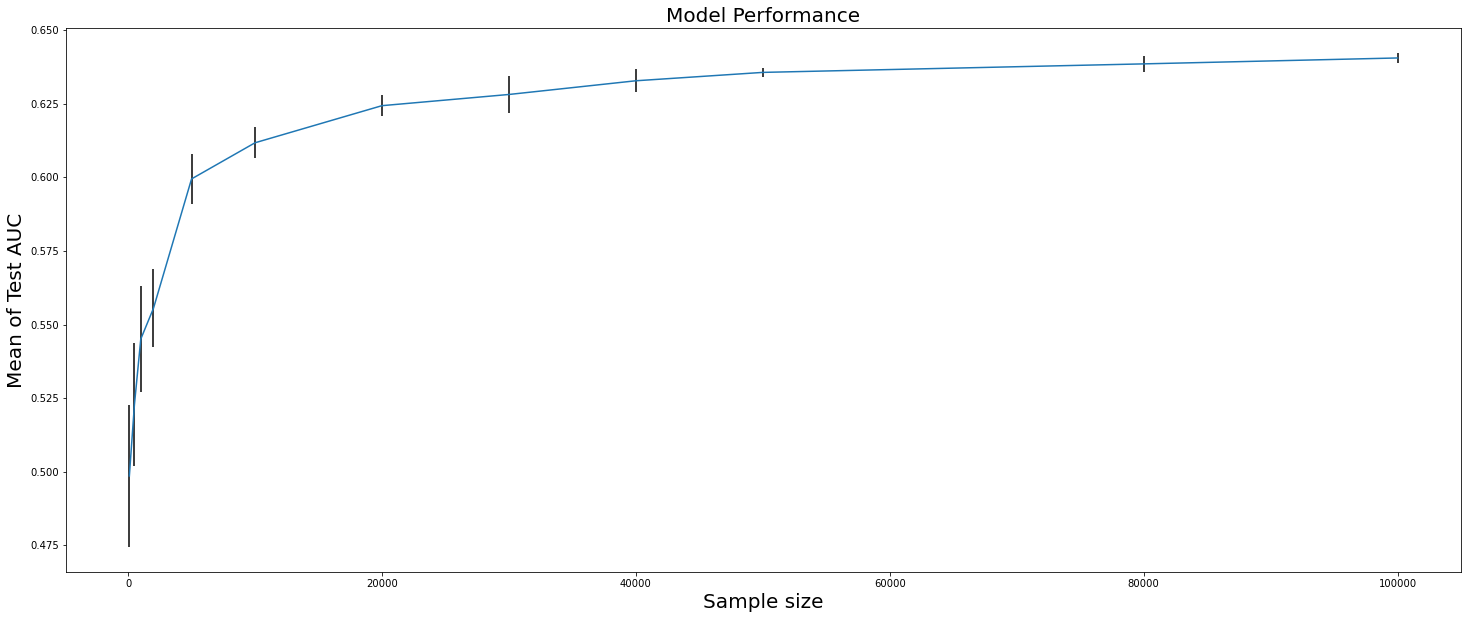

In [35]:
plt.figure(figsize=(25,10))
plt.errorbar(N, mean_std['Mean_of_Test_AUC'],yerr=mean_std['Standard_Deviation_of_Test_AUC'],ecolor='black') 
plt.title('Model Performance',fontsize=20)
plt.xlabel('Sample size',fontsize=20)
plt.ylabel('Mean of Test AUC',fontsize=20)
plt.show()

The speed of rising in mean Test AUC will be lower when sample size is bigger than 20000. And the Standard Deviation of the 10 random samples with N=20,000 is quite samll compared with some others.
So choose N=20,000 be to the minimum sample size.